In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_csv('data_sekolah.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head()

,no,nama,latitude,longitude,nama_sekolah
0,1,Ihsan,-5.169075,119.414552,SMAN 3
1,2,Aldy,-5.166001,119.413162,SMAN 2
2,3,Adel,-5.131854,119.418400,SMAN 1
3,4,Intan,-5.118539,119.417350,SMAN 4
4,5,Ikhlas,-5.171935,119.412924,SMAN 2


In [5]:
df_total=df_can.groupby('nama_sekolah').count().drop(['no','latitude','longitude'], axis=1)
df_total

,nama
nama_sekolah,
SMAN 1,43
SMAN 2,48
SMAN 3,37
SMAN 4,26
SMAN 5,46


In [5]:
df_total.rename({'nama' : 'Jumlah'}, axis=1, inplace='true')
df_total

,Jumlah
nama_sekolah,
SMAN 1,43
SMAN 2,48
SMAN 3,37
SMAN 4,26
SMAN 5,46


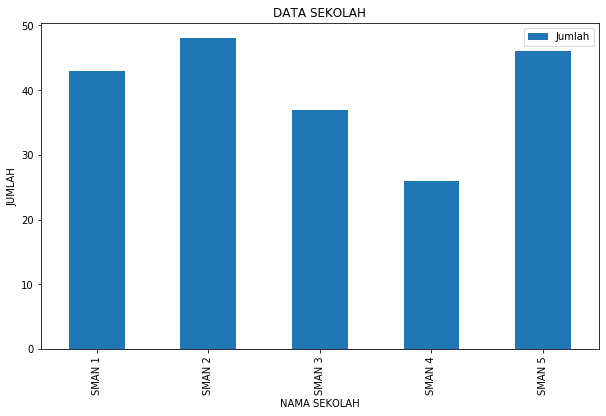

In [6]:
df_total.plot(kind='bar', figsize=(10, 6))

plt.xlabel('NAMA SEKOLAH') # add to x-label to the plot
plt.ylabel('JUMLAH') # add y-label to the plot
plt.title('DATA SEKOLAH') # add title to the plot

plt.show()

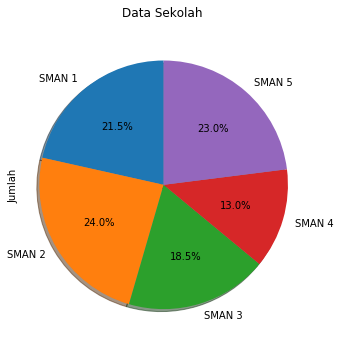

In [7]:
# autopct create %, start angle represent starting point
df_total['Jumlah'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Data Sekolah')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [8]:
import folium
print('Folium installed and imported!')

Folium installed and imported!


In [9]:
df_can.head()

,no,nama,latitude,longitude,nama_sekolah
0,1,Ihsan,-5.169075,119.414552,SMAN 3
1,2,Aldy,-5.166001,119.413162,SMAN 2
2,3,Adel,-5.131854,119.418400,SMAN 1
3,4,Intan,-5.118539,119.417350,SMAN 4
4,5,Ikhlas,-5.171935,119.412924,SMAN 2


In [11]:
#Read Data dari Link alternatif
df_can2 = pd.read_csv('https://drive.google.com/uc?authuser=0&id=19M-JapRFQG35LpG5_V4CNI4uwUBQ6Onh&export=download')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [12]:
df_can2.head()

,no,nama,latitude,longitude,nama_sekolah
0,1,Ihsan,-5.169075,119.414552,SMAN 3
1,2,Aldy,-5.166001,119.413162,SMAN 2
2,3,Adel,-5.131854,119.418400,SMAN 1
3,4,Intan,-5.118539,119.417350,SMAN 4
4,5,Ikhlas,-5.171935,119.412924,SMAN 2


In [13]:
# create a world map with a Mapbox Bright style.
world_map = folium.Map(tiles='Mapbox Bright')

# display the map
world_map

In [14]:
# Makassar latitude and longitude values
latitude = -5.140000
longitude = 119.422100

In [15]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# display the map of Makassar
sanfran_map

In [16]:
df_can2=df_can2.dropna(subset=['longitude'])

df_can2=df_can2.dropna(subset=['latitude'])

In [22]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_can2.latitude, df_can2.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='white',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)